# Importations

In [25]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, learning_curve, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical modeling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

#Tuning
from sklearn.model_selection import GridSearchCV

# Warnings and configs
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Data Loading

In [26]:
DATA_PATH = r"D:\Tradod\finalized dataset\finalized_dataset.csv"
TEST_SIZE = 0.2
RANDOM_STATE = 42

df_full = pd.read_csv(DATA_PATH)

df = df_full.copy()

df.head(10)

,file_name,province,year,num_all,num_c1,num_c2,num_c3,num_c4,num_c5,TV_S,TV_D,TV_O,A_S,temperature,rain,death
0,10-gharbi-1402,West Azerbaijan,1402,158676557,143988708,4212748,4080667,940300,5454134,11863639,11743768,1910596,76.435353,14.8,125.4,547
1,11-tehran-1400,Tehran,1400,853881003,790501679,32233500,11354258,7649788,12141778,90660358,200425016,422068,75.844029,17.8,182.2,405
2,11-yazd-1402,Yazd,1402,150082607,106646487,8115591,8468633,4819321,22032575,13465812,1865145,1815844,74.190094,20.6,84.2,190
3,11-zanjan-1402,Zanjan,1402,173125367,139241504,10692582,7070169,1848894,14272218,24901686,26151568,213343,72.975047,13.1,244.7,225
4,8-gilan-1403,Gilan,1403,204853185,176500206,15692424,2923832,1622469,8114254,5670114,13381898,776368,63.561433,17.8,1197.2,348
5,alborz-1395,Alborz,1395,492768581,444467578,22836036,7477670,7076848,10910449,51254930,96977037,937695,69.904311,17.2,242.3,180
6,alborz-1396,Alborz,1396,515748213,466775950,21700373,8979560,9423573,8868757,47331086,112896705,988281,67.802532,17.2,225.9,145
7,alborz-1397,Alborz,1397,534003291,490011336,16990789,8245891,9097411,9657864,41253161,120978996,958915,65.739903,17.6,203.4,182
8,alborz-1398,Alborz,1398,505759374,470872177,11043247,5974327,8185359,9684264,34216876,112732269,758237,65.848025,17.5,157.8,172
9,alborz-1399,Alborz,1399,422717481,392195987,11302875,5798356,5099122,8321141,31036762,83927866,700800,65.119208,19.0,118.9,181


In [27]:
df.shape

(279, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_name    279 non-null    object 
 1   province     279 non-null    object 
 2   year         279 non-null    int64  
 3   num_all      279 non-null    int64  
 4   num_c1       279 non-null    int64  
 5   num_c2       279 non-null    int64  
 6   num_c3       279 non-null    int64  
 7   num_c4       279 non-null    int64  
 8   num_c5       279 non-null    int64  
 9   TV_S         279 non-null    int64  
 10  TV_D         279 non-null    int64  
 11  TV_O         279 non-null    int64  
 12  A_S          279 non-null    float64
 13  temperature  279 non-null    float64
 14  rain         279 non-null    float64
 15  death        279 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 35.0+ KB


In [29]:
df[['province']].value_counts()

province                  
Alborz                        9
Kordestan                     9
Yazd                          9
West Azerbaijan               9
Tehran                        9
South Khorasan                9
Sistan and Baluchestan        9
Semnan                        9
Razavi Khorasan               9
Qom                           9
Qazvin                        9
North Khorasan                9
Mazandaran                    9
Markazi                       9
Lorestan                      9
Kohgiluyeh and Boyer-Ahmad    9
Ardabil                       9
Khuzestan                     9
Kermanshah                    9
Kerman                        9
Isfahan                       9
Ilam                          9
Hormozgan                     9
Hamedan                       9
Golestan                      9
Gilan                         9
Fars                          9
East Azerbaijan               9
Chaharmahal and Bakhtiari     9
Bushehr                       9
Zanjan       

In [30]:
df[['year']].value_counts()

year
1395    31
1396    31
1397    31
1398    31
1399    31
1400    31
1401    31
1402    31
1403    31
Name: count, dtype: int64

In [31]:
df = df.drop([0, 1, 2, 3, 4]) 
df = df[df['year'] != 1403]

In [32]:
df.head(10)

,file_name,province,year,num_all,num_c1,num_c2,num_c3,num_c4,num_c5,TV_S,TV_D,TV_O,A_S,temperature,rain,death
5,alborz-1395,Alborz,1395,492768581,444467578,22836036,7477670,7076848,10910449,51254930,96977037,937695,69.904311,17.2,242.3,180
6,alborz-1396,Alborz,1396,515748213,466775950,21700373,8979560,9423573,8868757,47331086,112896705,988281,67.802532,17.2,225.9,145
7,alborz-1397,Alborz,1397,534003291,490011336,16990789,8245891,9097411,9657864,41253161,120978996,958915,65.739903,17.6,203.4,182
8,alborz-1398,Alborz,1398,505759374,470872177,11043247,5974327,8185359,9684264,34216876,112732269,758237,65.848025,17.5,157.8,172
9,alborz-1399,Alborz,1399,422717481,392195987,11302875,5798356,5099122,8321141,31036762,83927866,700800,65.119208,19.0,118.9,181
10,alborz-1400,Alborz,1400,489035861,457183881,12586779,6182907,6116117,6966177,33535694,104818700,694692,69.096538,18.9,215.5,206
11,alborz-1401,Alborz,1401,546653192,515862848,12136249,6038162,6550848,6065085,32732308,152025155,1226166,67.938236,19.3,225.7,246
12,alborz-1402,Alborz,1402,551128208,518338894,12508203,5852075,8041547,6387489,38810481,140411579,630253,68.579854,17.9,160.3,207
14,ardabil-1395,Ardabil,1395,73032446,64796136,2609347,2773844,856396,1996723,3779076,9287500,1159638,66.195834,10.3,273.0,126
15,ardabil-1396,Ardabil,1396,86614565,77562755,3178854,2875056,975843,2022057,6229218,12306086,1205887,70.631552,10.6,247.4,114


# X & Y Split

In [33]:
feature_cols = ['num_c1','num_c2','num_c3','num_c4','num_c5','TV_S','TV_D','TV_O','A_S','temperature','rain','province','year']
target_col = 'death'

x = df[feature_cols]
y = df[[target_col]] 

# Encoding

In [34]:
x = pd.get_dummies(x, columns=['province', 'year'], drop_first=True)
x = x.astype(float)

In [35]:
x.head(3)

,num_c1,num_c2,num_c3,num_c4,num_c5,TV_S,TV_D,TV_O,A_S,temperature,...,province_West Azerbaijan,province_Yazd,province_Zanjan,year_1396,year_1397,year_1398,year_1399,year_1400,year_1401,year_1402
5,444467578.0,22836036.0,7477670.0,7076848.0,10910449.0,51254930.0,96977037.0,937695.0,69.904311,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,466775950.0,21700373.0,8979560.0,9423573.0,8868757.0,47331086.0,112896705.0,988281.0,67.802532,17.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,490011336.0,16990789.0,8245891.0,9097411.0,9657864.0,41253161.0,120978996.0,958915.0,65.739903,17.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Train & Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

In [37]:
X_train.head()

,num_c1,num_c2,num_c3,num_c4,num_c5,TV_S,TV_D,TV_O,A_S,temperature,...,province_West Azerbaijan,province_Yazd,province_Zanjan,year_1396,year_1397,year_1398,year_1399,year_1400,year_1401,year_1402
260,933961348.0,37551205.0,12086231.0,8607672.0,13029890.0,88344880.0,258101531.0,530369.0,76.022376,19.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
238,71255483.0,2871398.0,3718928.0,1292224.0,3015491.0,5440477.0,10142928.0,475056.0,75.554113,13.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112,27178061.0,3223108.0,2532104.0,1348342.0,5777137.0,9730938.0,3234876.0,394934.0,79.879159,18.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
192,196232414.0,13949480.0,7886904.0,7375034.0,16478310.0,44775808.0,41213894.0,7400490.0,81.601938,18.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,93226160.0,8315134.0,3252644.0,2776461.0,19595078.0,15651659.0,14241450.0,751512.0,73.623729,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Outliers

In [38]:
# Needs domain Knowledge

# Multicollinearity(Better)

In [39]:
numeric_X_train = X_train[['num_c1','num_c2','num_c3','num_c4','num_c5','TV_S','TV_D','TV_O','A_S','temperature','rain']]

x_vif = add_constant(numeric_X_train) 

vif_df = pd.DataFrame()
vif_df["feature"] = ['const'] + list(numeric_X_train.columns)
vif_df["VIF"] = [variance_inflation_factor(x_vif, i) for i in range(x_vif.shape[1])]

print(vif_df)

        feature         VIF
0         const  512.577009
1        num_c1   44.535597
2        num_c2    8.630799
3        num_c3    3.442724
4        num_c4    2.734748
5        num_c5    3.390094
6          TV_S    4.582352
7          TV_D   23.226352
8          TV_O    1.154124
9           A_S    2.175377
10  temperature    1.307324
11         rain    1.866354


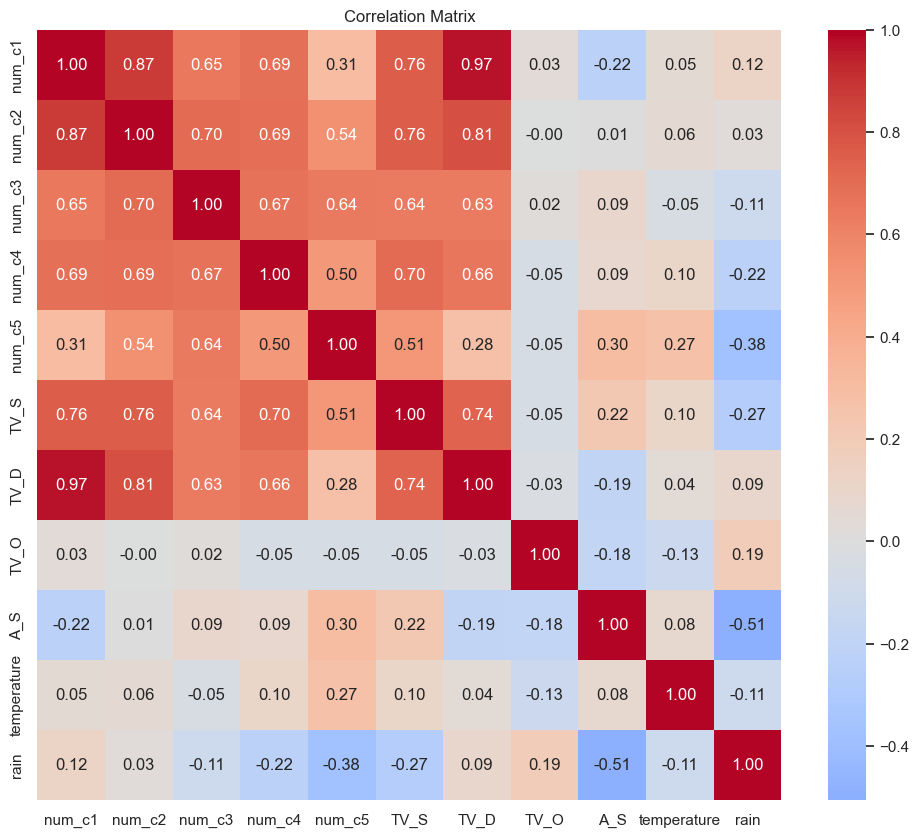

In [40]:
corr_matrix = numeric_X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [41]:
x_vif = add_constant(numeric_X_train.drop(columns=['num_c1'])) 

vif_df = pd.DataFrame()
vif_df["feature"] = ['const'] + list(numeric_X_train.drop(columns=['num_c1']).columns)
vif_df["VIF"] = [variance_inflation_factor(x_vif, i) for i in range(x_vif.shape[1])]

print(vif_df)

        feature         VIF
0         const  416.853983
1        num_c2    5.031534
2        num_c3    3.389973
3        num_c4    2.694589
4        num_c5    3.097035
5          TV_S    4.160234
6          TV_D    5.558066
7          TV_O    1.090483
8           A_S    1.721482
9   temperature    1.261639
10         rain    1.864629


In [42]:
x_vif = add_constant(numeric_X_train.drop(columns=['TV_D'])) 

vif_df = pd.DataFrame()
vif_df["feature"] = ['const'] + list(numeric_X_train.drop(columns=['TV_D']).columns)
vif_df["VIF"] = [variance_inflation_factor(x_vif, i) for i in range(x_vif.shape[1])]

print(vif_df)

        feature         VIF
0         const  483.950242
1        num_c1   10.657368
2        num_c2    7.345182
3        num_c3    3.439798
4        num_c4    2.730589
5        num_c5    3.373377
6          TV_S    4.567717
7          TV_O    1.073141
8           A_S    2.063794
9   temperature    1.296223
10         rain    1.866320


In [43]:
# domain knowledge and target + VIF comparison
X_train = X_train.drop(columns=['num_c1'])

In [44]:
X_test = X_test.drop(columns=['num_c1'])

# Scaling

In [45]:
from sklearn.compose import ColumnTransformer

scale_cols = ['num_c2','num_c3','num_c4','num_c5','TV_S','TV_D','TV_O','A_S','temperature','rain'] 

ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scale_cols)
    ],
    remainder='passthrough'  
)

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

# Fitting SVR

In [23]:
%%time
# ---------------------- Param Grid ----------------------
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# ---------------------- Repeated Nested CV + Filtering ----------------------
random_seeds = [42, 52, 62, 72, 82]
results = []

for seed in random_seeds:
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=seed)

    nested_r2_scores = []
    nested_mse_scores = []
    best_params_in_seed = []

    for train_idx, val_idx in outer_cv.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        grid = GridSearchCV(
            estimator=SVR(),
            param_grid=param_grid,
            cv=inner_cv,
            scoring='r2',
            n_jobs=-1
        )

        grid.fit(X_tr, y_tr.values.ravel())
        best_model = grid.best_estimator_
        best_params_in_seed.append(grid.best_params_)

        y_pred_val = best_model.predict(X_val)
        nested_r2_scores.append(r2_score(y_val, y_pred_val))
        nested_mse_scores.append(mean_squared_error(y_val, y_pred_val))

    mean_r2 = np.mean(nested_r2_scores)
    std_r2 = np.std(nested_r2_scores)
    mean_rmse = np.sqrt(np.mean(nested_mse_scores))

    # ---------- FILTER ----------
    accepted = (mean_r2 - std_r2) >= 0.40

    best_index = np.argmax(nested_r2_scores)
    final_params = best_params_in_seed[best_index]

    final_model = SVR(**final_params)
    final_model.fit(X_train_scaled, y_train)

    y_pred_test = final_model.predict(X_test_scaled)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


    results.append({
        'Seed': seed,
        'Mean_R2': mean_r2,
        'Std_R2': std_r2,
        'Accepted': accepted,
        'Test_R2': r2_test,
        'Test_RMSE': rmse_test,
        'Best_Hyperparams': final_params
    })

# ---------------------- Summary Table ----------------------
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)  

print("\nFiltered Model Summary Across Seeds:\n")
print(results_df)


Filtered Model Summary Across Seeds:

   Seed   Mean_R2    Std_R2  Accepted   Test_R2   Test_RMSE  \
0    42  0.438586  0.118992     False  0.645731  118.140771   
1    52  0.483780  0.080353      True  0.645731  118.140771   
2    62  0.443913  0.116102     False  0.645731  118.140771   
3    72  0.486112  0.130228     False  0.645731  118.140771   
4    82  0.432697  0.061321     False  0.645731  118.140771   

                                            Best_Hyperparams  
0  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}  
1  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}  
2  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}  
3  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}  
4  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}  
CPU times: total: 453 ms
Wall time: 652 ms


In [24]:
print('Train Y Mean:',y_train.mean().values[0])
print('Train Y STD:',y_train.std().values[0])
print('Test Y Mean:',y_test.mean().values[0])
print('Test Y STD:',y_test.std().values[0])

Train Y Mean: 378.37948717948717
Train Y STD: 231.76463262948468
Test Y Mean: 351.2244897959184
Test Y STD: 200.54449478296607
